# MATH432 HW6 

## 20210236 Woohyuk Choi

### Problem 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [8]:
cities = ["Seoul", "Busan", "Incheon", "Daegu", "Daejeon"]
populations = [9.41, 3.32, 2.96, 2.37, 1.47]  # populations in millions

In [9]:
# Creating a DataFrame
df = pd.DataFrame({
    'City': cities,
    'Population': populations
})

In [10]:
# Adding a Rank column
df['Rank'] = df['Population'].rank(ascending=False)

In [11]:
# Defining the Zipf's law function
def zipfs_law(r, a, b, c):
    return a * (r + c) ** (-b)

In [12]:
# Fitting the Zipf's law function to the top 5 cities
params, _ = curve_fit(zipfs_law, df['Rank'], df['Population'])

In [13]:
# Applying the fitted Zipf's law to predict populations for ranks 1-10
ranks = np.arange(1, 11)
predicted_populations = zipfs_law(ranks, *params)


In [14]:
# Adding predicted populations to the DataFrame
df_extended = pd.DataFrame({
    'Rank': ranks,
    'Predicted Population': predicted_populations
})

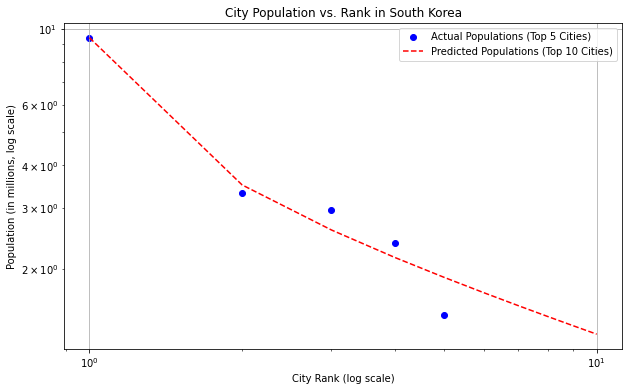

(array([ 3.74745907,  0.48207576, -0.85181213]),
    Rank  Predicted Population
 0     1              9.407366
 1     2              3.505953
 2     3              2.592107
 3     4              2.155926
 4     5              1.887480
 5     6              1.700848
 6     7              1.561353
 7     8              1.451944
 8     9              1.363127
 9    10              1.289141)

In [17]:
# Plotting the actual and predicted populations
plt.figure(figsize=(10, 6))
plt.scatter(df['Rank'], df['Population'], color='blue', label='Actual Populations (Top 5 Cities)')
plt.plot(df_extended['Rank'], df_extended['Predicted Population'], color='red', label='Predicted Populations (Top 10 Cities)', linestyle='--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('City Rank (log scale)')
plt.ylabel('Population (in millions, log scale)')
plt.title('City Population vs. Rank in South Korea')
plt.legend()
plt.grid(True)
plt.show()

# Outputting parameters and the extended DataFrame
params, df_extended

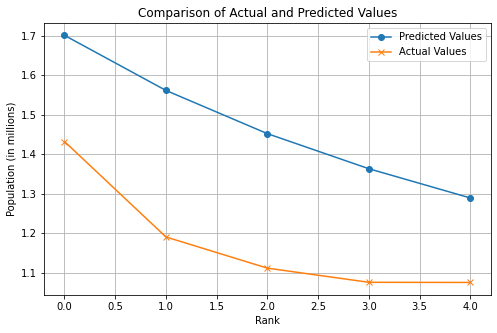

(0.30144043024285905, -4.0376791994611665)

In [21]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Provided data
predicted_values = [1.700848, 1.561353, 1.451944, 1.363127, 1.289141]
actual_values = [1.432049, 1.190368, 1.111371, 1.075570, 1.075202]

# Calculating RMSE and R^2
rmse = mean_squared_error(actual_values, predicted_values, squared=False)
r2 = r2_score(actual_values, predicted_values)

# Plotting the comparison graph
plt.figure(figsize=(8, 5))
plt.plot(predicted_values, label='Predicted Values', marker='o')
plt.plot(actual_values, label='Actual Values', marker='x')
plt.xlabel('Rank')
plt.ylabel('Population (in millions)')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

rmse, r2


### Problem 2

In [22]:
from collections import Counter
import numpy as np

# Generating the first 1000 Fibonacci numbers
def fibonacci_sequence(n):
    fib_sequence = [0, 1]
    for i in range(2, n):
        fib_sequence.append(fib_sequence[-1] + fib_sequence[-2])
    return fib_sequence

# Counting the first digits
def count_first_digits(numbers):
    first_digits = [str(num)[0] for num in numbers if num > 0]
    digit_count = Counter(first_digits)
    total = sum(digit_count.values())
    digit_distribution = {digit: count/total for digit, count in digit_count.items()}
    return digit_distribution

# Generating first 1000 Fibonacci numbers
fib_numbers = fibonacci_sequence(1000)
first_digit_distribution = count_first_digits(fib_numbers)

# Benford's Law prediction for first digits
benford_first_digit = {str(i): np.log10(1 + 1/i) for i in range(1, 10)}

first_digit_distribution, benford_first_digit



({'1': 0.3013013013013013,
  '2': 0.17717717717717718,
  '3': 0.12512512512512514,
  '5': 0.08008008008008008,
  '8': 0.05305305305305305,
  '6': 0.06706706706706707,
  '9': 0.04504504504504504,
  '4': 0.09509509509509509,
  '7': 0.056056056056056056},
 {'1': 0.3010299956639812,
  '2': 0.17609125905568124,
  '3': 0.12493873660829993,
  '4': 0.09691001300805642,
  '5': 0.07918124604762482,
  '6': 0.06694678963061322,
  '7': 0.05799194697768673,
  '8': 0.05115252244738129,
  '9': 0.04575749056067514})

In [23]:
# Counting the second digits
def count_second_digits(numbers):
    second_digits = [str(num)[1] for num in numbers if len(str(num)) > 1]
    digit_count = Counter(second_digits)
    total = sum(digit_count.values())
    digit_distribution = {digit: count/total for digit, count in digit_count.items()}
    return digit_distribution

# Counting second digits in Fibonacci numbers
second_digit_distribution = count_second_digits(fib_numbers)

# Benford's Law prediction for second digits
benford_second_digit = {str(i): sum([np.log10(1 + 1/(10*k + i)) for k in range(1, 10)]) for i in range(10)}

second_digit_distribution, benford_second_digit



({'3': 0.1067472306143001,
  '1': 0.11581067472306143,
  '4': 0.1027190332326284,
  '5': 0.09566968781470292,
  '9': 0.08257804632426989,
  '7': 0.09264853977844914,
  '8': 0.0866062437059416,
  '0': 0.11983887210473314,
  '6': 0.09365558912386707,
  '2': 0.10372608257804633},
 {'0': 0.11967926859688076,
  '1': 0.1138901034075564,
  '2': 0.10882149900550823,
  '3': 0.10432956023095939,
  '4': 0.10030820226757937,
  '5': 0.09667723580232243,
  '6': 0.09337473578303615,
  '7': 0.09035198926960332,
  '8': 0.08757005357886138,
  '9': 0.08499735205769224})

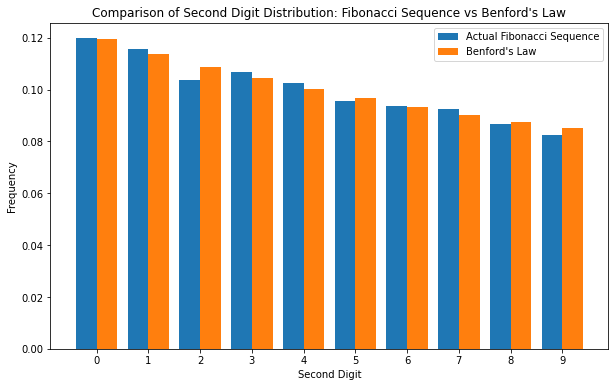

In [24]:
import matplotlib.pyplot as plt

# Converting the distributions to lists for plotting
actual_second_digits = [second_digit_distribution.get(str(i), 0) for i in range(10)]
benford_second_digits = [benford_second_digit.get(str(i), 0) for i in range(10)]
digits = list(range(10))

# Creating a plot
plt.figure(figsize=(10, 6))
plt.bar(digits, actual_second_digits, width=0.4, label='Actual Fibonacci Sequence', align='center')
plt.bar([x + 0.4 for x in digits], benford_second_digits, width=0.4, label='Benford\'s Law', align='center')
plt.xlabel('Second Digit')
plt.ylabel('Frequency')
plt.title('Comparison of Second Digit Distribution: Fibonacci Sequence vs Benford\'s Law')
plt.xticks([x + 0.2 for x in digits], digits)
plt.legend()
plt.show()


### Problem 3

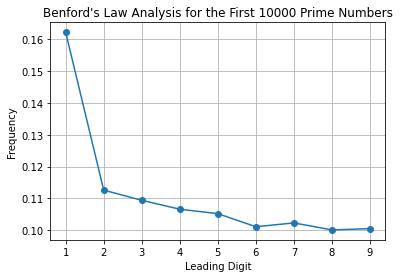

In [42]:
import numpy as np
import matplotlib.pyplot as plt

def is_prime(x):
    if x <= 3:
        return x > 1
    if x % 2 == 0 or x % 3 == 0:
        return False
    for k in range(5, int(x**0.5) + 1, 6):
        if x % k == 0 or x % (k + 2) == 0:
            return False
    return True

def collect_primes_and_analyze(N):
    k = 100
    primes = []
    while len(primes) < N:
        k += 1
        if is_prime(k):
            primes.append(k)

    # Extract the first digit of each prime number
    first_digits = [int(str(prime)[0]) for prime in primes]

    # Count the occurrences of each digit
    digit_counts = np.zeros(9)
    for digit in first_digits:
        digit_counts[digit - 1] += 1

    # Normalize the counts
    digit_frequencies = digit_counts / sum(digit_counts)
    return digit_frequencies

# Collect and analyze 100 prime numbers
N = 10000
digit_frequencies = collect_primes_and_analyze(N)

# Plot the results
digits = range(1, 10)
plt.plot(digits, digit_frequencies, '-o')
plt.xlabel('Leading Digit')
plt.ylabel('Frequency')
plt.title(f"Benford's Law Analysis for the First {N} Prime Numbers")
plt.xticks(digits)
plt.grid(True)
plt.show()


### Problem 4

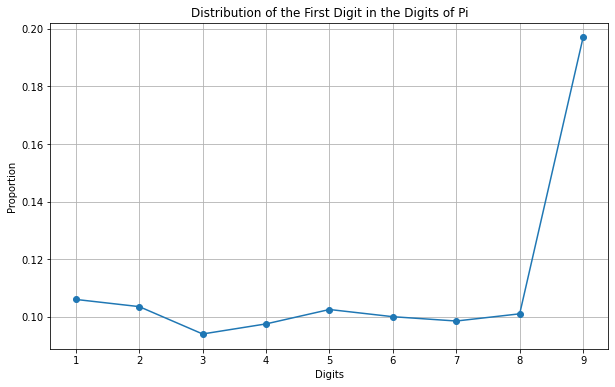

In [43]:
from decimal import *
import decimal
import numpy as np
import matplotlib.pyplot as plt

def compute_pi(n):
    decimal.getcontext().prec = n + 3
    decimal.getcontext().Emax = 999999999
    C = 426880 * decimal.Decimal(10005).sqrt()
    K = decimal.Decimal(6)
    M = decimal.Decimal(1)
    X = decimal.Decimal(1)
    L = decimal.Decimal(13591409)
    S = L
    # For better precision, we calculate to n+3 and truncate the last two digits
    for i in range(1, n+3):
        M = decimal.Decimal(M * ((1728*i*i*i)-(2592*i*i)+(1104*i)-120)/(i*i*i))
        L = decimal.Decimal(545140134+L)
        X = decimal.Decimal(-262537412640768000*X)
        S += decimal.Decimal((M*L) / X)
    return str(C/S)[:-2]  # Pi is C/S

# Compute the first 2000 digits of pi
pi_digits = str(compute_pi(2000))

# Extract the digits after the decimal point
pi_digits_after_decimal = pi_digits[2:]

# Count the first digits in the sequence
num = np.zeros(9)
for digit in pi_digits_after_decimal:
    if digit.isdigit():
        num[int(digit)-1] += 1

# Calculate the proportion of each digit
num = num / sum(num)

# Plotting the distribution
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, 10), num, '-o')
plt.title("Distribution of the First Digit in the Digits of Pi")
plt.xlabel("Digits")
plt.ylabel("Proportion")
plt.grid(True)
plt.show()


# Problem 5

In [44]:
# let's make our own corpus
from nltk.corpus import PlaintextCorpusReader

In [46]:
my_directory = "/Users/asaf0/Desktop/Work/2023-2/MATH433"
my_list = PlaintextCorpusReader(my_directory,'.*\.txt')

In [47]:
files = my_list.fileids()
nf = len(files)

files

['1984.txt', 'hamlet.txt', 'norwegianwood.txt', 'sense.txt', 'solitude.txt']

In [49]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asaf0\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

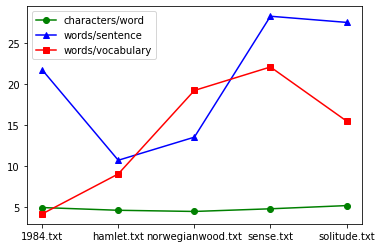

In [52]:
# comparing texts by average character, word, vacb numbers
ave_char = []
ave_word = []
freq_vocab = []
for i in my_list.fileids():
    c = len(my_list.raw(i))
    w = len(my_list.words(i))
    s = len(my_list.sents(i))
    v = len(set(w.lower() for w in my_list.words(i))) # number of vacabulary
    green = c/w # char/words
    blue = w/s # word/sentences
    red = w/v # word/vocabulary
    
    ave_char.append(green)
    ave_word.append(blue)
    freq_vocab.append(red)

plt.plot(range(0, nf), ave_char, '-og', label='characters/word')
plt.plot(range(0, nf), ave_word, '-^b', label='words/sentence')
plt.plot(range(0, nf), freq_vocab, '-sr', label='words/vocabulary')
plt.xticks(np.arange(nf), (files))
plt.legend()
plt.show()


1984

In [54]:
# Most frequently used word in the Bible (KJV)
files = my_list.fileids()
nf = len(files)
a_vocab = set(w for w in my_list.words('1984.txt'))
text1 = my_list.open('1984.txt').read()
vocab_list = list(a_vocab)
t = len(a_vocab)
c_vocab = np.zeros((t,2), dtype = object)
for i in range(t):
    voc = vocab_list[i]
    ct = text1.count(voc)
    c_vocab[i,0] = ct
    c_vocab[i,1] = voc
    
def getkey(item):
    return item[0]
sorted(c_vocab, key = getkey, reverse = True)


[array([2501, 't'], dtype=object),
 array([2150, 'a'], dtype=object),
 array([1883, 'i'], dtype=object),
 array([1712, 's'], dtype=object),
 array([1168, 'd'], dtype=object),
 array([809, 'he'], dtype=object),
 array([600, 'in'], dtype=object),
 array([514, 'the'], dtype=object),
 array([395, ','], dtype=object),
 array([350, 're'], dtype=object),
 array([345, 'an'], dtype=object),
 array([304, '.'], dtype=object),
 array([298, 'as'], dtype=object),
 array([271, 'of'], dtype=object),
 array([270, 'on'], dtype=object),
 array([269, 'it'], dtype=object),
 array([250, 'at'], dtype=object),
 array([224, 'to'], dtype=object),
 array([200, 'was'], dtype=object),
 array([191, 'or'], dtype=object),
 array([181, 'and'], dtype=object),
 array([175, 'me'], dtype=object),
 array([129, 'be'], dtype=object),
 array([126, 'her'], dtype=object),
 array([114, '-'], dtype=object),
 array([108, 'no'], dtype=object),
 array([89, 'his'], dtype=object),
 array([87, 'had'], dtype=object),
 array([85, 'I'], d